## Project 4: Part1
#### My goal here is to build two models ( using logistic regression and KNN classification) to predict salary
#### Below represents my working. Report is in a separate document for easier reading

In [66]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from sklearn.tree import DecisionTreeClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDRegressor, SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline

In [2]:
data = pd.read_csv('/Users/lohyenwei/Desktop/data_science/Projects/Project4/Project4_uploads/yen/clean_dataP4.csv')

In [3]:
data

,Unnamed: 0,title,salary,location,advertiser,industry,description,cleaned_salary,number_salary,final_salary,sal_cat,lead_count
0,0,Project Coordinator - Data entry,b'Up to $42ph plus Super',Sydney,Preacta Recruitment,Administration & Office Support,"b'<div class=""videoembed"" id=""FlashContent""></...",42,42,82992,high,793
1,1,Data Engineer / Data Scientist,b'Start up culture',Sydney,Motion Recruitment,Information & Communication Technology,"b""\n<p>Australian start up success story requi...",0,0,0,0.0,793
2,2,Data Analyst,0,Sydney,Westpac Group,Banking & Financial Services,b'<span>The Customer Data Analyst will support...,0,0,0,0.0,793
3,3,Media Data Analyst,0,Sydney,Big Wave Digital,Science & Technology,b'\n<div>\n<p>Are you looking to join massive ...,0,0,0,0.0,793
4,4,NaN,b'Attractive remuneration',Sydney,IPA,Information & Communication Technology,b'<span><strong>Surveyor - Telecommunications<...,0,0,0,0.0,793
5,5,NaN,"b'$90,000 - $100,000 plus Super + Bonus'",Sydney,Finite IT Recruitment Solutions,Information & Communication Technology,"b'\n<p><font face=""Calibri"" size=""2"">Data Ware...",90000100000,90000100000,95000,high,793
6,6,Data Steward - SAP / MDM,"b'$70,000 to $80,000 + super'",Sydney,Perigon Group Pty Limited,Information & Communication Technology,"b""Data Steward - SAP / MDM<br/>\n<br/>\r\nWe a...",7000080000,7000080000,75000,good,793
7,7,Data Engineer,0,Sydney,IAG,Information & Communication Technology,"b""\n<ul>\n<li>One of Australia's leading gener...",0,0,0,0.0,793
8,8,Data Scientist,0,Sydney,NRMA Motoring &amp; Services,Marketing & Communications,b'\n<p>The NRMA was born to keep people moving...,0,0,0,0.0,793
9,9,Data Analyst,0,Sydney,NRMA Motoring &amp; Services,Marketing & Communications,b'\n<p>The NRMA was born to keep people moving...,0,0,0,0.0,793


In [4]:
## actually, for modelling, I don't need the 'dirty' salary columns. Let's drop 'em.
data.drop(['Unnamed: 0', 'salary','cleaned_salary','number_salary', 'lead_count'], axis=1, inplace=True)

In [5]:
data

,title,location,advertiser,industry,description,final_salary,sal_cat
0,Project Coordinator - Data entry,Sydney,Preacta Recruitment,Administration & Office Support,"b'<div class=""videoembed"" id=""FlashContent""></...",82992,high
1,Data Engineer / Data Scientist,Sydney,Motion Recruitment,Information & Communication Technology,"b""\n<p>Australian start up success story requi...",0,0.0
2,Data Analyst,Sydney,Westpac Group,Banking & Financial Services,b'<span>The Customer Data Analyst will support...,0,0.0
3,Media Data Analyst,Sydney,Big Wave Digital,Science & Technology,b'\n<div>\n<p>Are you looking to join massive ...,0,0.0
4,NaN,Sydney,IPA,Information & Communication Technology,b'<span><strong>Surveyor - Telecommunications<...,0,0.0
5,NaN,Sydney,Finite IT Recruitment Solutions,Information & Communication Technology,"b'\n<p><font face=""Calibri"" size=""2"">Data Ware...",95000,high
6,Data Steward - SAP / MDM,Sydney,Perigon Group Pty Limited,Information & Communication Technology,"b""Data Steward - SAP / MDM<br/>\n<br/>\r\nWe a...",75000,good
7,Data Engineer,Sydney,IAG,Information & Communication Technology,"b""\n<ul>\n<li>One of Australia's leading gener...",0,0.0
8,Data Scientist,Sydney,NRMA Motoring &amp; Services,Marketing & Communications,b'\n<p>The NRMA was born to keep people moving...,0,0.0
9,Data Analyst,Sydney,NRMA Motoring &amp; Services,Marketing & Communications,b'\n<p>The NRMA was born to keep people moving...,0,0.0


In [6]:
# Okay, so I want to predict salary (good, high) based off the occurrence of certain words in title
# and description, as well as the industry and advertiser/employer
# need to take title and description and reduce to keywords

In [7]:
data.title.value_counts()

Data Scientist                                                                          8
Business Support Manager                                                                6
Customer Support Officer - Multiple Positions - State Government Role                   6
Business Development Manager                                                            5
Data Scientist                                                                          5
Administration Supervisor (Operational Support role)                                    5
Data Analyst                                                                            4
Modeller - 3D CAD                                                                       4
Administrator                                                                           3
          Receptionist                                                                  3
Payroll Officer                                                                         3
Senior Ana

In [8]:
data.title.nunique()

815

In [9]:
data.isnull().sum()

title           144
location          0
advertiser        0
industry          0
description      23
final_salary      0
sal_cat           0
dtype: int64

In [10]:
data.shape

(1075, 7)

In [11]:
# have to drop nans to run countvectorizer
data.dropna(inplace=True)

In [12]:
data.shape

(931, 7)

In [13]:
data.sal_cat.value_counts()

0.0     682
high    132
good    117
Name: sal_cat, dtype: int64

In [14]:
# let's pull out the keywords from title.

total_words = [title for title in data['title']]

vectorizer = CountVectorizer(analyzer = "word",ngram_range=(1,2),stop_words = 'english') 
train_data_features = vectorizer.fit_transform(total_words)

title_keys = pd.DataFrame(vectorizer.transform(total_words).todense(), columns=vectorizer.get_feature_names())

title_keys.sum().nlargest(35)

data                225
manager             169
analyst             137
senior               87
officer              78
business             75
engineer             70
support              61
sales                55
customer             48
administration       47
administrator        44
marketing            43
analytics            42
developer            41
scientist            40
data scientist       38
assistant            36
coordinator          36
digital              36
consultant           34
account              32
data analyst         30
development          28
executive            28
big                  27
big data             27
service              27
sydney               27
services             26
account manager      23
customer service     22
specialist           22
entry                21
insights             21
dtype: int64

In [15]:
# From above take the words for titles and looking for a combination to replace with that title. 
keyword=['data','business','consultant','manager','developer','analyst','architect','scientist',
         'senior','junior','businessintelligence','intelligence','dataanalyst', 'data analyst', 
         'business intelligence', 'engineer']

In [16]:
title_keys[['data']]

,data
0,1
1,2
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


In [17]:
# get a list of column names of title_keys
total_list = title_keys.columns.tolist()

In [18]:
len(total_list)

2669

In [19]:
# iterate through list, taking only column names which match keywords
title_list = []

for word in total_list:
    if word in keyword:
        title_list.append(word)

In [20]:
title_list

['analyst',
 'architect',
 'business',
 'business intelligence',
 'consultant',
 'data',
 'data analyst',
 'developer',
 'engineer',
 'intelligence',
 'junior',
 'manager',
 'scientist',
 'senior']

In [21]:
title_keys = title_keys[title_list]
title_keys

,analyst,architect,business,business intelligence,consultant,data,data analyst,developer,engineer,intelligence,junior,manager,scientist,senior
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,2,0,0,1,0,0,0,1,0
2,1,0,0,0,0,1,1,0,0,0,0,0,0,0
3,1,0,0,0,0,1,1,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0
5,0,0,0,0,0,1,0,0,1,0,0,0,0,0
6,0,0,0,0,0,1,0,0,0,0,0,0,1,0
7,1,0,0,0,0,1,1,0,0,0,0,0,0,0
8,0,0,0,0,0,1,0,0,0,0,0,0,1,0
9,1,0,0,0,0,1,0,0,0,0,0,0,0,0


In [22]:
# sweet, now we do the same for description.
# gonna need lots of stopwords

stop = stopwords.words('english')
stop += ['xa0', 'span', 'xc2', 'xe3']
stop.append("need")
stop.append("in")
stop.append("re")
stop.append("are")
stop.append("for")
stop.append("have")
stop.append("like")
stop.append("be")
stop.append("see")
stop.append("do")
stop.append("trade")
stop.append("u2026")
stop.append("http")
stop.append("mrzlgv")
stop.append("bit")
stop.append("ly")
stop.append("div")
stop.append("class")
stop.append("forum")
stop.append("item")
stop.append("shar")
stop.append("profile")
stop.append("es")
stop += ['li', 'ul', 'br', ' ul', 'strong', 'xe2','x80','font','size','family','xa2', 'sans','serif','style','text',
         'margin','align','0cm','line height','10', '0pt', '11pt', 'calibri', 'com', 'au','height', 'normal', 'line',
        'em', 'contact', 'zealand', 'button', 'color','black','end','join','click','videoembed','flashcontent','id',
        'note','cover','letter','day','may','2017','please','apply']

In [23]:
total_desc_words = [desc for desc in data['description']]

vectorizer = CountVectorizer(analyzer = "word",ngram_range=(2,3),max_features=50,stop_words = stop) 
train_data_features = vectorizer.fit_transform(total_desc_words)

desc_keys = pd.DataFrame(vectorizer.transform(total_desc_words).todense(), columns=vectorizer.get_feature_names())

desc_keys.columns

Index(['ability work', 'attention detail', 'big data', 'business intelligence',
       'communication skills', 'confidential discussion', 'customer service',
       'data analysis', 'data analytics', 'data driven', 'data entry',
       'data management', 'data science', 'excellent communication',
       'excellent communication skills', 'exciting opportunity',
       'experience using', 'experience working', 'fast paced',
       'financial services', 'full time', 'high level', 'high quality',
       'highly regarded', 'ideal candidate', 'internal external',
       'interpersonal skills', 'key responsibilities', 'machine learning',
       'management skills', 'microsoft office', 'minimum years',
       'previous experience', 'problem solving', 'project management',
       'responsibilities include', 'skills ability', 'skills experience',
       'successful candidate', 'sydney cbd', 'team environment',
       'tertiary qualifications', 'time management', 'track record',
       'verbal co

In [82]:
# okay, let's take a look at our data dataframe again
data

,location,advertiser,industry,final_salary,analyst,architect,business,business intelligence,consultant,data,...,tertiary qualifications,time management,track record,verbal communication,verbal communication skills,work closely,written verbal,written verbal communication,years experience,cat_salary
0,Sydney,Preacta Recruitment,Administration & Office Support,82992.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2
1,Sydney,Motion Recruitment,Information & Communication Technology,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Sydney,Westpac Group,Banking & Financial Services,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Sydney,Big Wave Digital,Science & Technology,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,Sydney,Perigon Group Pty Limited,Information & Communication Technology,75000.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
7,Sydney,IAG,Information & Communication Technology,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8,Sydney,NRMA Motoring &amp; Services,Marketing & Communications,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Sydney,NRMA Motoring &amp; Services,Marketing & Communications,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,Sydney,Caltex Australia,Science & Technology,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,Sydney,Origin,Consulting & Strategy,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


/Users/lohyenwei/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


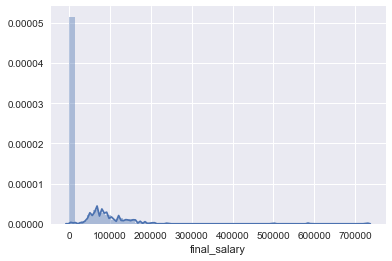

In [76]:
sns.distplot(data['final_salary'])

In [80]:
data.final_salary.mean()

25326.021223470663

In [83]:
data.cat_salary.value_counts()

0.0    591
2      113
1       97
Name: cat_salary, dtype: int64

In [25]:
# I'm going to use title_keys, advertiser, industry, and desc_keys to predict sal_cat. so let's get them into
# a single dataframe
data.drop('title',axis=1,inplace=True)
data.drop('description',axis=1,inplace=True)
#data.drop('final_salary',axis=1,inplace=True)
data

,location,advertiser,industry,final_salary,sal_cat
0,Sydney,Preacta Recruitment,Administration & Office Support,82992,high
1,Sydney,Motion Recruitment,Information & Communication Technology,0,0.0
2,Sydney,Westpac Group,Banking & Financial Services,0,0.0
3,Sydney,Big Wave Digital,Science & Technology,0,0.0
6,Sydney,Perigon Group Pty Limited,Information & Communication Technology,75000,good
7,Sydney,IAG,Information & Communication Technology,0,0.0
8,Sydney,NRMA Motoring &amp; Services,Marketing & Communications,0,0.0
9,Sydney,NRMA Motoring &amp; Services,Marketing & Communications,0,0.0
10,Sydney,Caltex Australia,Science & Technology,0,0.0
12,Sydney,Origin,Consulting & Strategy,0,0.0


In [26]:
#data.rename(columns={'sal_cat':'salary'}, inplace=True)

In [27]:
data = pd.concat([data, title_keys, desc_keys], axis=1)
data.shape

(1061, 69)

In [28]:
# oops. realised that sal_cat needs to be a numerical categorical column. 
# original code
#def salary_categoriser(salary):
#    salary = float(salary)
#    if salary == 0:
#        pass
#    elif salary < 80000:
#        salary = 'good'
#    elif salary >= 80000:
#        salary = 'high'
#    return salary

def salary_num(salary):
    salary = str(salary)
    if salary == 'good':
        salary = 1
    elif salary == 'high':
        salary = 2
    return salary


In [29]:
data['cat_salary'] = [salary_num(sal) for sal in data['sal_cat']]

In [30]:
data.cat_salary.value_counts()

0.0    682
2      132
nan    130
1      117
Name: cat_salary, dtype: int64

In [31]:
data.dropna(inplace=True)

In [32]:
data.cat_salary.value_counts()

0.0    591
2      113
1       97
Name: cat_salary, dtype: int64

In [33]:
data.drop('sal_cat',axis=1,inplace=True)

In [34]:
#data.rename(columns={'cat_salary':'salary'},inplace=True)

In [35]:
data.drop('title_keylist',axis=1,inplace=True)

In [36]:
data

,location,advertiser,industry,final_salary,analyst,architect,business,business intelligence,consultant,data,...,tertiary qualifications,time management,track record,verbal communication,verbal communication skills,work closely,written verbal,written verbal communication,years experience,cat_salary
0,Sydney,Preacta Recruitment,Administration & Office Support,82992.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2
1,Sydney,Motion Recruitment,Information & Communication Technology,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Sydney,Westpac Group,Banking & Financial Services,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Sydney,Big Wave Digital,Science & Technology,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,Sydney,Perigon Group Pty Limited,Information & Communication Technology,75000.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
7,Sydney,IAG,Information & Communication Technology,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8,Sydney,NRMA Motoring &amp; Services,Marketing & Communications,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Sydney,NRMA Motoring &amp; Services,Marketing & Communications,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,Sydney,Caltex Australia,Science & Technology,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,Sydney,Origin,Consulting & Strategy,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Logistic Regression

In [68]:
# sweet, now we can start having a little fun. First, make X to predict salary.
# X here will be everything except location, advertiser and industry (as these are not numerical)
predictors = [col for col in data.columns if col not in ['cat_salary','advertiser', 'industry','location','final_salary']]
X = data[predictors]
y = data.cat_salary


In [69]:
# baseline accuracy
y.value_counts()/y.count()

0.0    0.737828
2      0.141074
1      0.121099
Name: cat_salary, dtype: float64

In [70]:
#X_dummies = pd.get_dummies(X, drop_first = True)
#X=X_dummies.copy()
ss = StandardScaler()
Xs = ss.fit_transform(X)

In [71]:
print('X: ', X.shape)
print('Xs: ', Xs.shape)
print('y: ', y.shape)

X:  (801, 66)
Xs:  (801, 66)
y:  (801,)


In [72]:
X

,analyst,architect,business,business intelligence,business intelligence,consultant,data,data analyst,developer,engineer,...,team environment,tertiary qualifications,time management,track record,verbal communication,verbal communication skills,work closely,written verbal,written verbal communication,years experience
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [73]:
y.convert_objects(convert_numeric=True)
y = pd.to_numeric(y)
y.dtype

/Users/lohyenwei/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


dtype('float64')

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=8)

In [45]:
data.shape

(801, 69)

In [46]:
# run logistic regression and test

lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.77639751552795033

In [47]:
scores = cross_val_score(lr, X_test, y_test, cv=10)
predictions = cross_val_predict(lr, X_test, y_test, cv=10)

In [48]:
scores.mean()

0.77862394957983194

In [49]:
# well. score seems to do better than baseline. Let's try KNN next

## KNN

In [50]:
# create a dataframe where there are no 0's for y values. this will be our training set for KNN
KNN_train = data[data.cat_salary != '0.0']
print(KNN_train.shape)

predictors_knn = [col for col in KNN_train.columns if col not in ['cat_salary','advertiser', 'industry','location','final_salary']]
X_knn = KNN_train[predictors]
y_knn = KNN_train['cat_salary']

(210, 69)


In [51]:
X_knn

,analyst,architect,business,business intelligence,business intelligence,consultant,data,data analyst,developer,engineer,...,team environment,tertiary qualifications,time management,track record,verbal communication,verbal communication skills,work closely,written verbal,written verbal communication,years experience
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
18,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
23,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
24,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
29,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
# Standardize predictor matrix
Xs_knn = ss.fit_transform(X_knn)

In [53]:
print('Xs_knn', Xs_knn.shape)
print('X_knn', X_knn.shape)
print('y_knn', y_knn.shape)

Xs_knn (210, 66)
X_knn (210, 66)
y_knn (210,)


In [54]:
# finding best k to use to impute salary class
#def find_best_k_cls(X, y, k_min=1, k_max=51, step=2, cv=5):
#    k_range = range(k_min, k_max+1, step)
#    accs = []
#    for k in k_range:
#        knn = KNeighborsClassifier(n_neighbors=k)
#        scores = cross_val_score(knn, Xs_knn, y_knn, cv=cv)
#        accs.append(np.mean(scores))
#    print(np.max(accs), np.argmax(k_range))
#    return np.argmax(k_range)

In [56]:
#find_best_k_cls(Xs_knn, y_knn)

In [58]:
knn = KNeighborsClassifier(n_neighbors=25)
knn.fit(Xs, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=25, p=2,
           weights='uniform')

In [59]:
# use knn.predict to impute y!
cat_salary_impute = knn.predict(Xs)
cat_salary_impute

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0

In [ ]:
# well. it looks like it just guesses 0 every time. Which makes it 73.7% accurate, according to baseline.
# Might be able to improve this if I can get the find_best_k_cls function to work

## Decision Tree Classifiers

In [67]:
# Let's try decision tree classifier
# 4 decision classifiers of different depths
dtc1 = DecisionTreeClassifier(max_depth=1)
dtc2 = DecisionTreeClassifier(max_depth=2)
dtc3 = DecisionTreeClassifier(max_depth=3)
dtcN = DecisionTreeClassifier(max_depth=None)

In [74]:
dtc1.fit(Xs, y)
dtc2.fit(Xs, y)
dtc3.fit(Xs, y)
dtcN.fit(Xs, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [75]:
dtc1_scores = cross_val_score(dtc1, Xs, y, cv=4)
dtc2_scores = cross_val_score(dtc2, Xs, y, cv=4)
dtc3_scores = cross_val_score(dtc3, Xs, y, cv=4)
dtcN_scores = cross_val_score(dtcN, Xs, y, cv=4)

print(dtc1_scores, np.mean(dtc1_scores))
print(dtc2_scores, np.mean(dtc2_scores))
print(dtc3_scores, np.mean(dtc3_scores))
print(dtcN_scores, np.mean(dtcN_scores))

[ 0.73267327  0.74        0.725       0.73366834] 0.732835402259
[ 0.73267327  0.715       0.725       0.73366834] 0.726585402259
[ 0.73267327  0.715       0.725       0.73366834] 0.726585402259
[ 0.56930693  0.615       0.535       0.54773869] 0.56676140604


In [ ]:
# well, looks like decision tree classification is less accurate than logreg, and slightly worse than baseline

In [63]:
salary_corr=X.corrwith(y)
print(salary_corr.sort_values(ascending=False))

consultant                        0.065237
work closely                      0.058411
customer service                  0.056360
microsoft office                  0.049252
data                              0.041934
experience using                  0.041424
scientist                         0.037363
data analytics                    0.031581
big data                          0.027842
data entry                        0.024648
team environment                  0.024209
engineer                          0.020831
problem solving                   0.011819
high level                        0.011742
machine learning                  0.009558
data science                      0.008233
full time                         0.007555
track record                      0.007106
high quality                      0.004454
interpersonal skills              0.002148
skills experience                 0.000232
responsibilities include         -0.000107
project management               -0.001269
key respons

### So, according to this, salary is most highly correlated with:
#### Consultant work
#### working closely with others
#### customer service
#### microsoft office
#### big data/ data analytics
#### machine learning

### And NEGATIVELY correlated with:
#### time management
#### junior roles
#### exciting opportunity (maybe that's why it has to be exciting?)

In [64]:
data.to_csv('/Users/lohyenwei/Desktop/data_science/Projects/Project4/Project4_uploads/yen/P4_part2.csv')